In [67]:
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import mlflow 

%matplotlib inline

In [104]:
mlflow.set_tracking_uri("http://localhost:5000")
mlflow.set_experiment("ml")
mlflow.autolog()

2022/07/13 19:09:47 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


In [69]:
wine = load_wine()
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [70]:
pd.concat([pd.DataFrame(wine.data),pd.DataFrame(wine.target)],axis=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [71]:
data = pd.DataFrame(wine.data,columns=wine.feature_names)
data["target"]=wine.target
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


<AxesSubplot:>

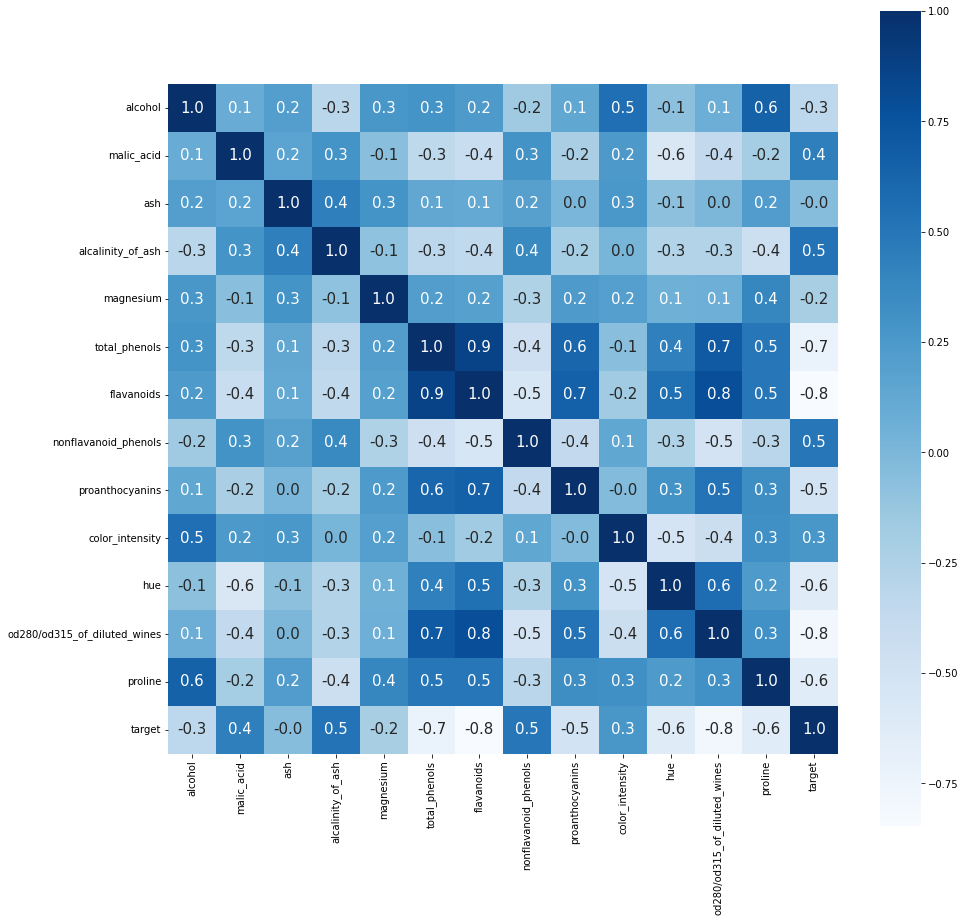

In [72]:
corr = data.corr()
# Plotting the heatmap of correlation between features
plt.figure(figsize=(15,15))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Blues')

In [73]:
X = data.drop(['target'],axis = 1)
y = data['target']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)


In [111]:
clf = tree.DecisionTreeClassifier(criterion="entropy")

mlflow.start_run(run_name='tree')
clf.fit(X_train,y_train)
mlflow.end_run()

In [78]:
clf.predict(X_test)

array([2, 2, 0, 0, 1, 2, 0, 1, 0, 1, 1, 0, 2, 2, 0, 1, 0, 1, 1, 2, 1, 2,
       1, 2, 0, 2, 1, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 0, 0, 2, 2, 0, 1, 2,
       1, 0, 1, 2, 0, 2, 1, 1, 1, 0])

In [79]:
y_test

163    2
142    2
14     0
45     0
81     1
157    2
26     0
74     1
1      0
76     1
90     1
18     0
170    2
166    2
33     0
105    1
48     0
102    1
93     1
156    2
91     1
165    2
124    1
168    2
6      0
134    2
69     1
92     1
143    2
144    2
47     0
77     1
12     0
113    1
167    2
140    2
16     0
19     0
2      0
159    2
135    2
29     0
24     0
61     1
108    1
5      0
101    1
141    2
25     0
148    2
125    1
89     1
97     1
11     0
Name: target, dtype: int32

In [76]:
clf.score(X_test,y_test)

0.9629629629629629

In [81]:
# import graphviz
# feature_name = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']
# dot_data = tree.export_graphviz(clf,out_file=None,feature_names=feature_name,class_names=["琴酒","雪莉","贝尔摩德"],filled=True,rounded=True)

# graph = graphviz.Source(dot_data)
# graph

In [101]:

feature_name = ["alcohol","malic_acid","ash","alcalinity_of_ash","magnesium","total_phenols","flavanoids","nonflavanoid_phenols","proanthocyanins","color_intensity","hue","od280/od315_of_diluted_wines","proline"]
dot_data = tree.export_text(clf,feature_names=feature_name)
print(dot_data)

|--- od280/od315_of_diluted_wines <= 2.19
|   |--- color_intensity <= 3.82
|   |   |--- class: 1
|   |--- color_intensity >  3.82
|   |   |--- flavanoids <= 1.58
|   |   |   |--- class: 2
|   |   |--- flavanoids >  1.58
|   |   |   |--- class: 1
|--- od280/od315_of_diluted_wines >  2.19
|   |--- proline <= 722.50
|   |   |--- alcalinity_of_ash <= 17.75
|   |   |   |--- nonflavanoid_phenols <= 0.29
|   |   |   |   |--- class: 1
|   |   |   |--- nonflavanoid_phenols >  0.29
|   |   |   |   |--- class: 0
|   |   |--- alcalinity_of_ash >  17.75
|   |   |   |--- class: 1
|   |--- proline >  722.50
|   |   |--- magnesium <= 132.00
|   |   |   |--- class: 0
|   |   |--- magnesium >  132.00
|   |   |   |--- class: 1



*对于中文字体的支持没有设置*

[Text(0.4230769230769231, 0.9, 'od280/od315_of_diluted_wines <= 2.19\nentropy = 1.554\nsamples = 124\nvalue = [41, 52, 31]\nclass = XL'),
 Text(0.15384615384615385, 0.7, 'color_intensity <= 3.825\nentropy = 0.689\nsamples = 38\nvalue = [0, 7, 31]\nclass = BRMD'),
 Text(0.07692307692307693, 0.5, 'entropy = 0.0\nsamples = 6\nvalue = [0, 6, 0]\nclass = XL'),
 Text(0.23076923076923078, 0.5, 'flavanoids <= 1.58\nentropy = 0.201\nsamples = 32\nvalue = [0, 1, 31]\nclass = BRMD'),
 Text(0.15384615384615385, 0.3, 'entropy = 0.0\nsamples = 31\nvalue = [0, 0, 31]\nclass = BRMD'),
 Text(0.3076923076923077, 0.3, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = XL'),
 Text(0.6923076923076923, 0.7, 'proline <= 722.5\nentropy = 0.998\nsamples = 86\nvalue = [41, 45, 0]\nclass = XL'),
 Text(0.5384615384615384, 0.5, 'alcalinity_of_ash <= 17.75\nentropy = 0.159\nsamples = 43\nvalue = [1, 42, 0]\nclass = XL'),
 Text(0.46153846153846156, 0.3, 'nonflavanoid_phenols <= 0.29\nentropy = 0.918\nsamples = 

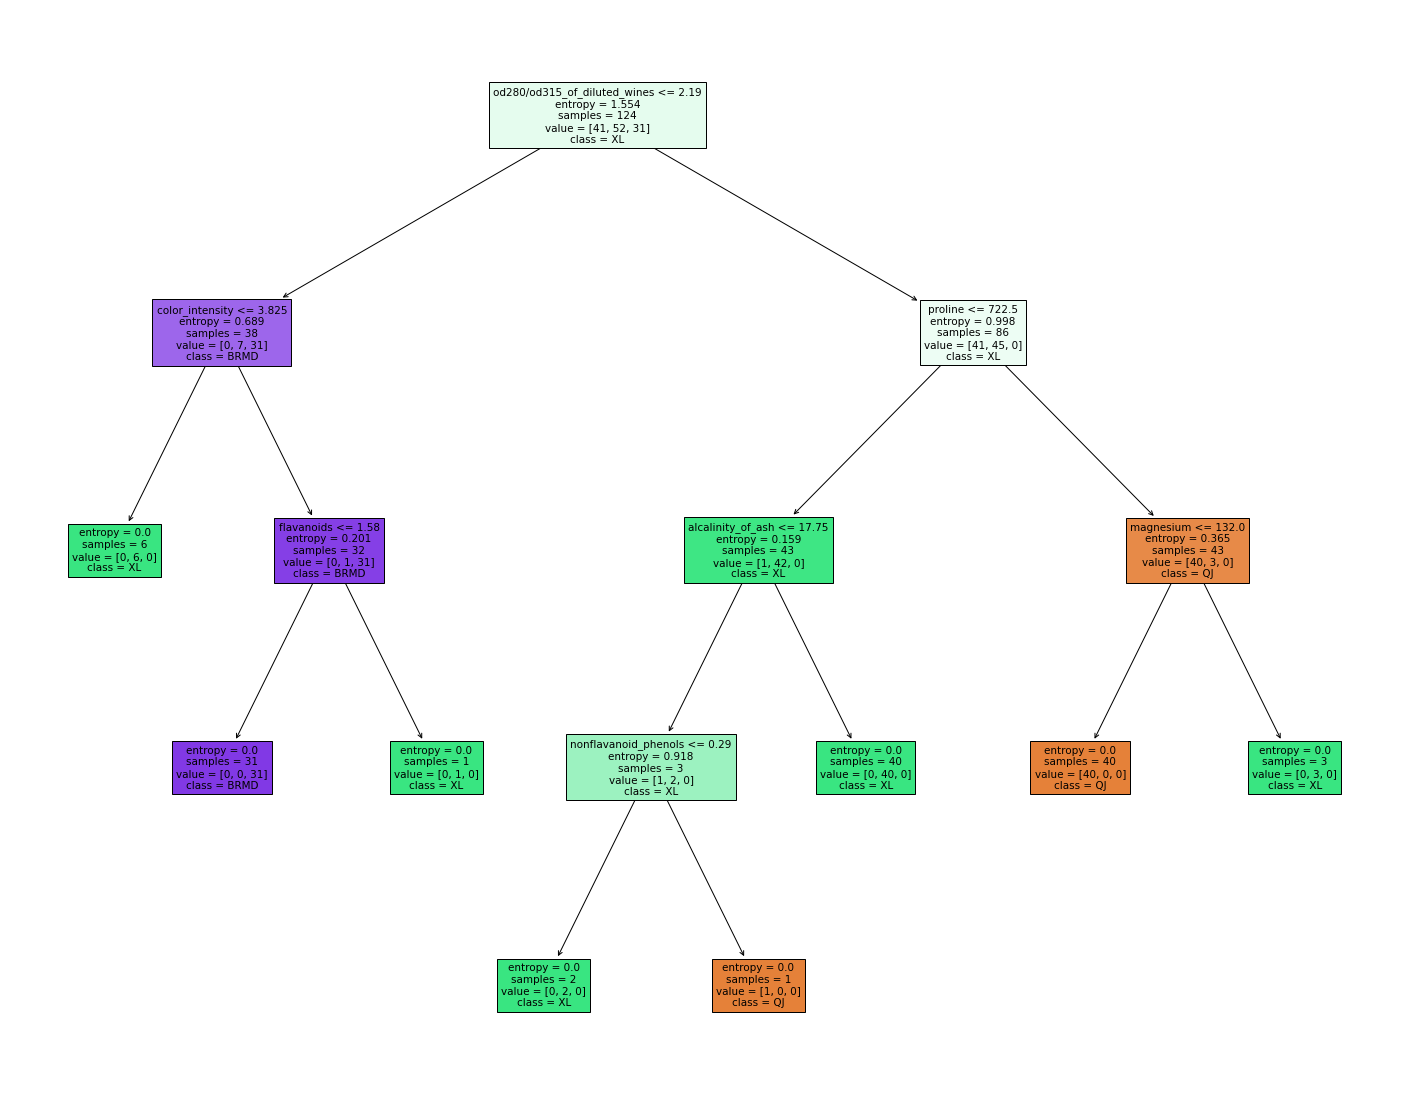

In [102]:
from matplotlib.font_manager import FontProperties


fig = plt.figure(figsize=(25,20))

tree.plot_tree(
    clf, 
    feature_names=feature_name,  
    class_names=["QJ","XL","BRMD"],
    filled=True,
)

,value,name
0,0.000000,alcohol
1,0.000000,malic_acid
2,0.000000,ash
3,0.021575,alcalinity_of_ash
4,0.000000,magnesium
5,0.000000,total_phenols
6,0.424440,flavanoids
7,0.000000,nonflavanoid_phenols
8,0.000000,proanthocyanins
9,0.220571,color_intensity


In [140]:
from pandas import DataFrame
with mlflow.start_run(run_name="pruning_tree"):
    clf.min_samples_leaf = 3
    clf.random_state = 4
    model2 = clf.fit(X_train,y_train)
    df = DataFrame(clf.feature_importances_,columns={"value"})
    df["name"]=clf.feature_names_in_ 
    for name, value in df.items():
        mlflow.log_param(name,value)

[Text(0.4090909090909091, 0.875, 'flavanoids <= 1.575\nentropy = 1.554\nsamples = 124\nvalue = [41, 52, 31]\nclass = XL'),
 Text(0.18181818181818182, 0.625, 'color_intensity <= 3.825\nentropy = 0.689\nsamples = 38\nvalue = [0, 7, 31]\nclass = BRMD'),
 Text(0.09090909090909091, 0.375, 'entropy = 0.0\nsamples = 7\nvalue = [0, 7, 0]\nclass = XL'),
 Text(0.2727272727272727, 0.375, 'entropy = 0.0\nsamples = 31\nvalue = [0, 0, 31]\nclass = BRMD'),
 Text(0.6363636363636364, 0.625, 'proline <= 722.5\nentropy = 0.998\nsamples = 86\nvalue = [41, 45, 0]\nclass = XL'),
 Text(0.45454545454545453, 0.375, 'alcalinity_of_ash <= 17.75\nentropy = 0.159\nsamples = 43\nvalue = [1, 42, 0]\nclass = XL'),
 Text(0.36363636363636365, 0.125, 'entropy = 0.918\nsamples = 3\nvalue = [1, 2, 0]\nclass = XL'),
 Text(0.5454545454545454, 0.125, 'entropy = 0.0\nsamples = 40\nvalue = [0, 40, 0]\nclass = XL'),
 Text(0.8181818181818182, 0.375, 'color_intensity <= 3.55\nentropy = 0.365\nsamples = 43\nvalue = [40, 3, 0]\ncla

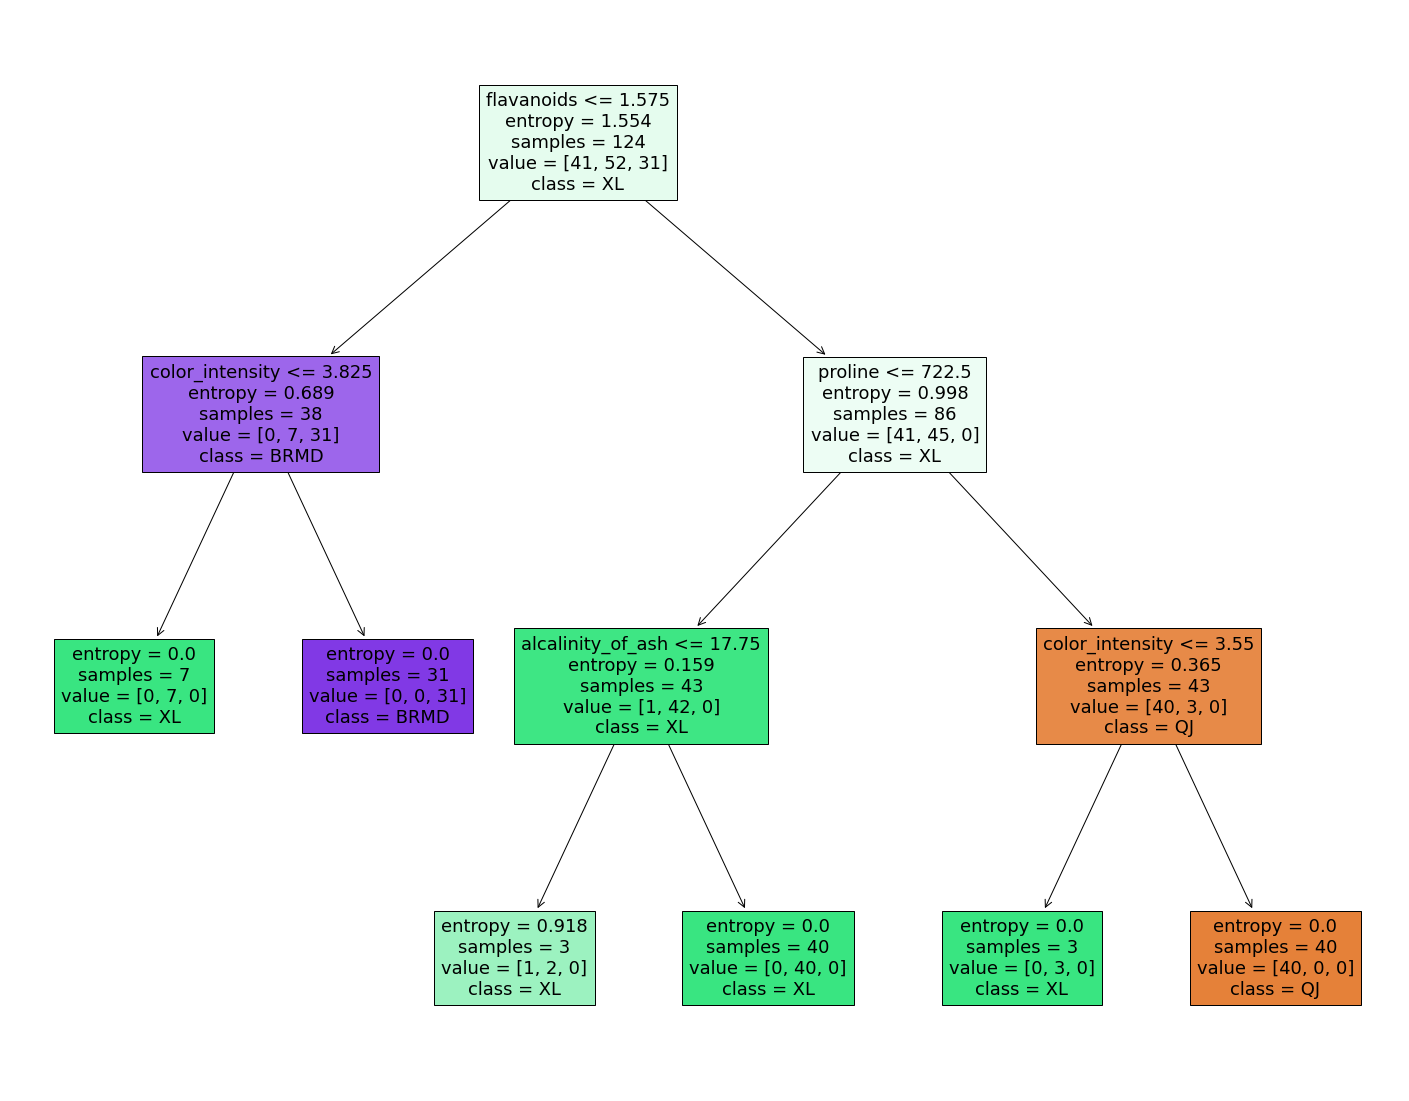

In [120]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(
    model2, 
    feature_names=feature_name,  
    class_names=["QJ","XL","BRMD"],
    filled=True,
)